# Baseball Case Study

### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Reading File¶

In [4]:
df = pd.read_csv('baseball.csv')

# -------------------------------Getting to Know About Data---------------------------------------

## 1. Overall Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (30, 17)


In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
df.sample(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Observations - 
- W: Win
    - Number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
- R: Runs Scored
    - Runs scored times reached home plate legally and safely
- AB: At Bat
    - Plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H: Hits Allowed
    - Hits allowed: total hits allowed
- 2B: Double
    - Hits on which the batter reaches second base safely without the contribution of a fielding error 
- 3B: Triple
    - Hits on which the batter reaches third base safely without the contribution of a fielding error
- HR: Home runs
    - Hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB: Base on balls
    - Hitter not swinging at four pitches called out of the strike zone and awarded first base.
- SO: Strike Out
    - Number of batters who received strike three
- SB: Stolen base
    - Number of bases advanced by the runner while the ball is in the possession of the defense
- RA: Run average
    - Number of runs allowed times nine divided by innings pitched
- ER: Earned_Runs
    - Number of runs that did not occur as a result of errors or passed balls
- ERA: Earned run average
    - Total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG: Complete Games
    - Number of games where player was the only pitcher for their team
- SHO: Shutout
    - Number of complete games pitched with no runs allowed
- SV:  Save
    - Number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E: Error
    - Number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [10]:
# Removing duplicate values
df.duplicated().sum()

0

### Observations - 
There are no duplicates in column

# Renaming Column Names for Better Understanding

In [11]:
df = df.rename(columns={'W':'Win', 'R':'Runs_Scored', 'AB': 'At_Bat', 'H': 'Hits_Allowed', '2B': 'Double', '3B': 'Triple', 'HR': 'Home_runs', 'BB': 'Base_on_balls', 'SO': 'Strike_Out', 'SB': 'Stolen_base', 'RA':'Run_average', 'ER':'Earned_Runs', 'ERA': 'Earned_run_average', 'CG': 'Complete_Games', 'SHO': 'Shutout', 'SV': 'Save', 'E': 'Error'})

# 2. Getting to Know More About Data Type

In [12]:
df.dtypes

Win                     int64
Runs_Scored             int64
At_Bat                  int64
Hits_Allowed            int64
Double                  int64
Triple                  int64
Home_runs               int64
Base_on_balls           int64
Strike_Out              int64
Stolen_base             int64
Run_average             int64
Earned_Runs             int64
Earned_run_average    float64
Complete_Games          int64
Shutout                 int64
Save                    int64
Error                   int64
dtype: object

# 3 Gettting to Know Five Number Summery for Continuous variable

In [13]:
df.describe()

,Win,Runs_Scored,At_Bat,Hits_Allowed,Double,Triple,Home_runs,Base_on_balls,Strike_Out,Stolen_base,Run_average,Earned_Runs,Earned_run_average,Complete_Games,Shutout,Save,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [14]:
df.nunique()

Win                   24
Runs_Scored           28
At_Bat                29
Hits_Allowed          29
Double                22
Triple                23
Home_runs             27
Base_on_balls         29
Strike_Out            29
Stolen_base           27
Run_average           30
Earned_Runs           30
Earned_run_average    30
Complete_Games         9
Shutout               12
Save                  20
Error                 21
dtype: int64

### Observation - 
1. Win - Target Feature/Variable
    - Minimum count of win is 63
    - Maximum count is 100
    - 25 % Teams has won, 74 games
    - 25 % Teams has won games between 74 to 81
    - 25 % Teams has won games between 81 to 87
2. Runs_Scored
    - Average runs scored by team = 688.23
    - Minimum runs scored by team = 573
    - Maximum runs scored by team = 891
    - 25% teams scored runs greater than 689 and less than 718.
3. At_Bat: Plate Appearance (Hit + Error + Fielder's choice)
    - Required to calculate 
        1. Batting average   
        2. Slugging percentage
    - Teams have average of 5516
    - Standard Deviation is lower, so there is less variation in At_Bat
4. Hits_Allowed
   - Average of 1403.53 hits_allowed
   - 50% of hits are below 1382
   - With minimum of 1324 and maximum of 1515
5. Double
    - Feature Double has average of 274
    - Has minimum of 236 doubles and maximum of 308
    - Overall 50% of records has doubles less than 275
    - Rest 25% has doubles greated than 288
6. Triple
    - Feature Triple has average of 31
    - Has minimum of 13 Triple and maximum of 49
    - Overall 50% of records has Triple less than 31
    - Rest 25% has Triples greated than 39
7. Home_runs
    - Teams has average home runs of 163
    - Around 50% of records has HR lesser than 158
8. Base_on_balls: 
    - hitter not swinging at four pitches called out of the strike zone and awarded first base
    - Teams has average of 469 base on balls
    - Minimum and Maximum values are 375 BB and 570 BB
9. Strike_Out
    - Average Strike_Out rate is 1248
    - With minimum of 973 and maximum of 1518.
10. Stolen_base
    - Stolen base has average of 83, with min = 44 and max of 134
11. Run_average
    - Average runs earned by team are 688.23
    - With minimum runs of 525 and maximum of 844
12. Earned_Runs
    - Average Earned_Runs by teams are 635
    - With 50% of teams making Earned_Runs less than 644.
    - Teams having minimum of 478 and maximum of 799 Earned Runs in season
13. Earned_run_average
    - Team have scored average of 4 runs in each match of season
    - 50% of teams has scored runs lesser than 4.
    - Around 25% teams scored runs greater than 4.
    - Some of teams has scored runs equal to 5
14. Complete_Games
    - Teams has min. of 0 and max. of 11 games completed
    - 75% teams has run lesser than 6.
15. Shutout
    - There are four matches with no runs
    - Around 11 matchs with shoutout
    - Maximum 21 matches with shoutout
16. Save
    - Average saves by team is 43
    - Minimum of 28 and maximum of 62.
17. Error
    - Average number of errors made by team is 94.
    - Teams with error of 75 as minimum and 126 as maximum.

# 5 Getting to Know About Missing Values

In [15]:
# Feature Wise missing Values
df.isnull().sum()

Win                   0
Runs_Scored           0
At_Bat                0
Hits_Allowed          0
Double                0
Triple                0
Home_runs             0
Base_on_balls         0
Strike_Out            0
Stolen_base           0
Run_average           0
Earned_Runs           0
Earned_run_average    0
Complete_Games        0
Shutout               0
Save                  0
Error                 0
dtype: int64

In [16]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


# Observation -
From results we can see that, there are no missing values in dataset

# --------------------------------------------------EDA------------------------------------------------------

## 1. Scatterplot

## 1. Scatterplot

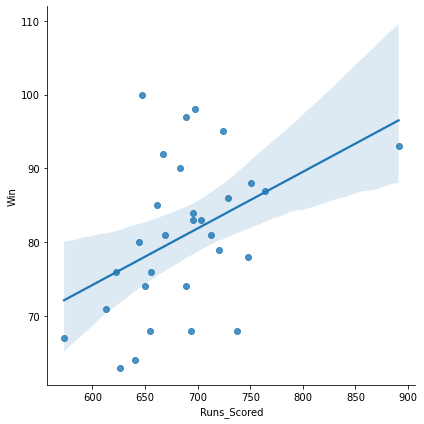

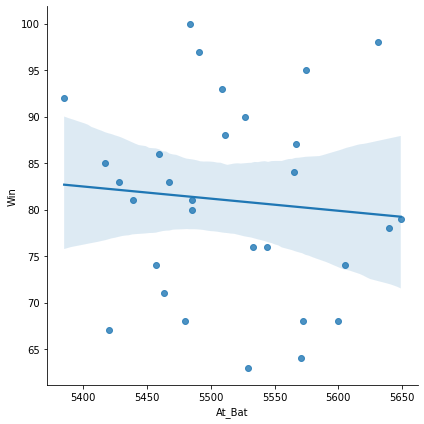

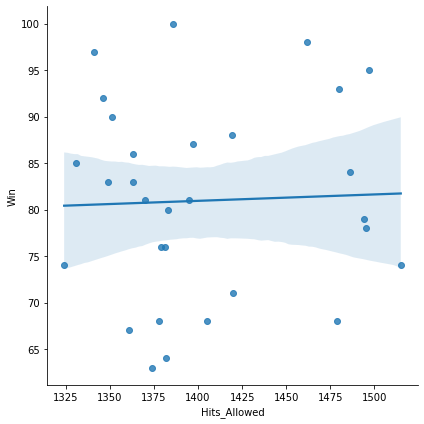

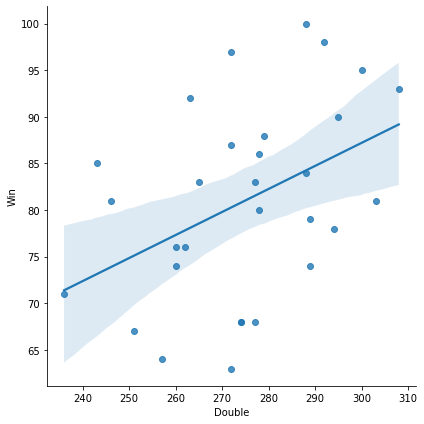

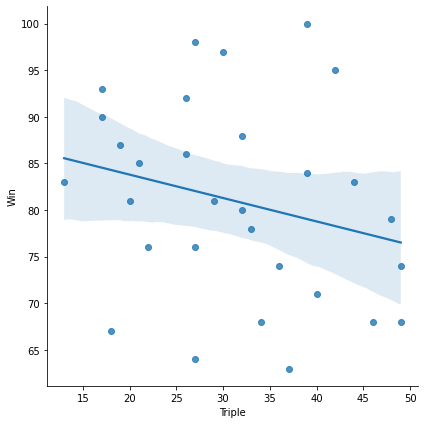

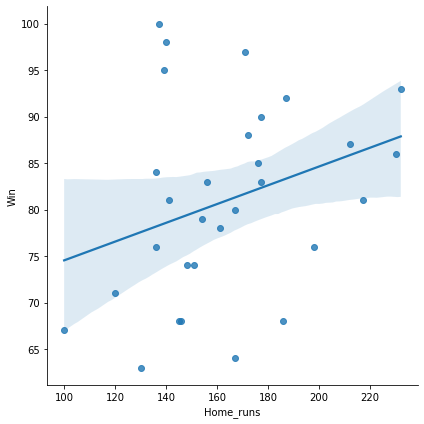

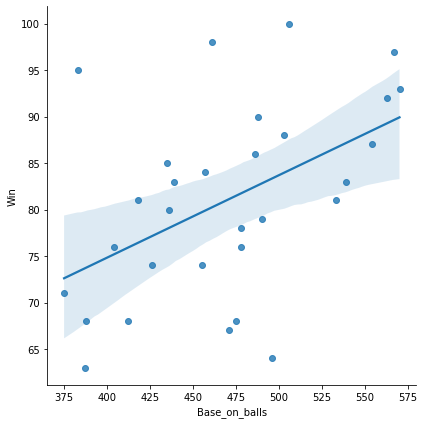

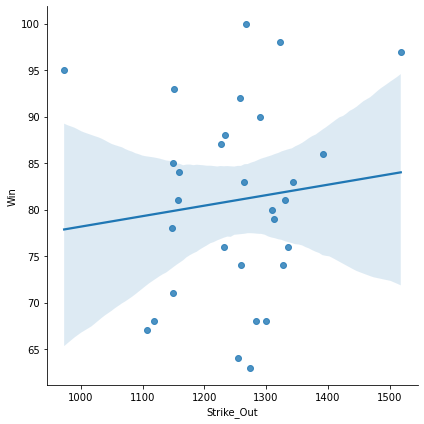

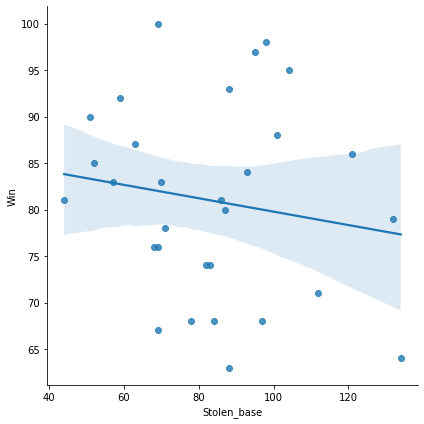

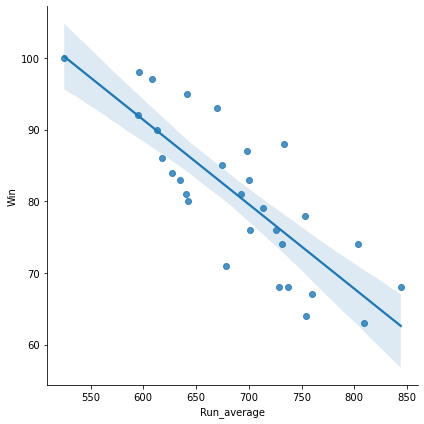

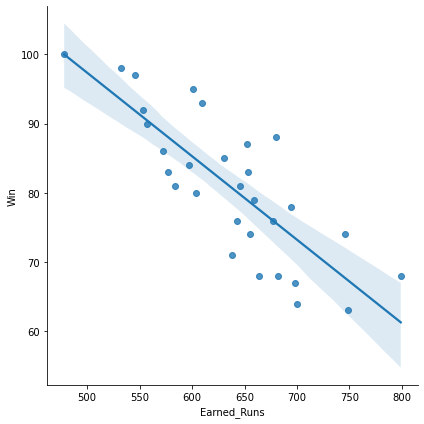

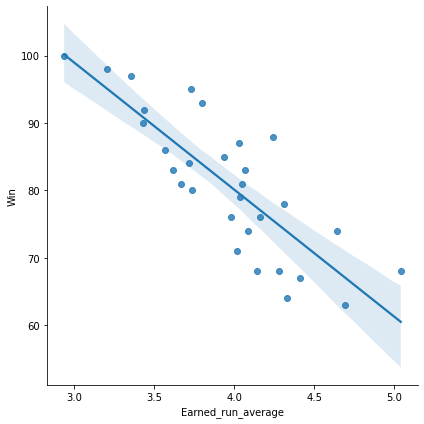

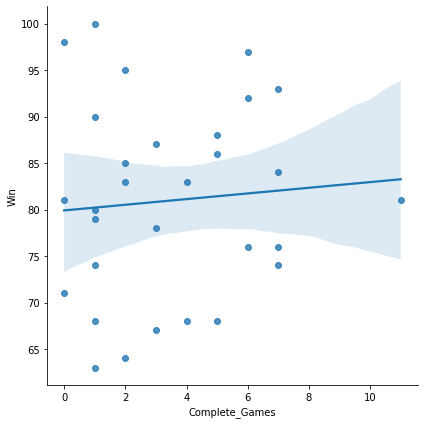

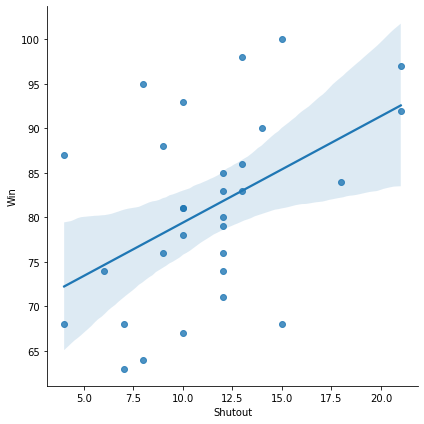

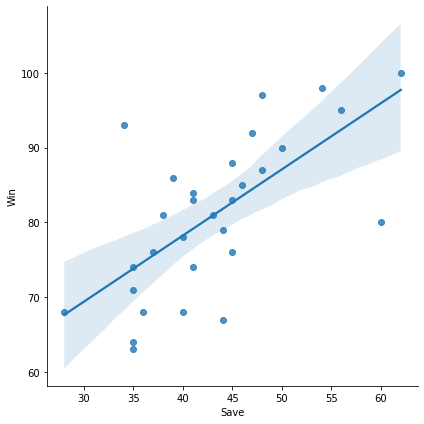

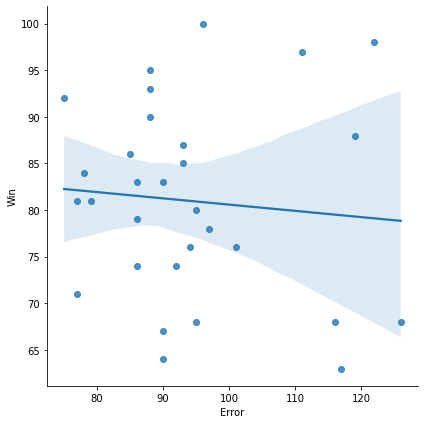

In [17]:
columns = ['Runs_Scored', 'At_Bat', 'Hits_Allowed', 'Double', 'Triple', 'Home_runs', 'Base_on_balls', 
           'Strike_Out', 'Stolen_base', 'Run_average', 'Earned_Runs', 'Earned_run_average', 'Complete_Games', 
           'Shutout', 'Save', 'Error']
for i in columns:
    sns.pairplot(df,x_vars=[i],y_vars='Win',aspect=1, kind='reg', height=6)
    plt.tight_layout()

<AxesSubplot:xlabel='Runs_Scored', ylabel='Win'>

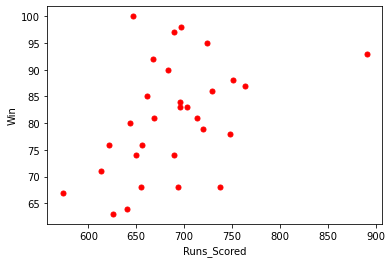

In [18]:
df.plot.scatter(x='Runs_Scored',y='Win', c = 'red', s = 25)

### Observation - 
As number of Runs_Scored increase, number of wins increases. It happens to be Positive correlation.

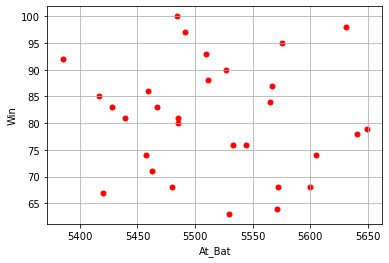

In [19]:
df.plot.scatter(x='At_Bat',y='Win', c = 'red', s = 25)
plt.grid()

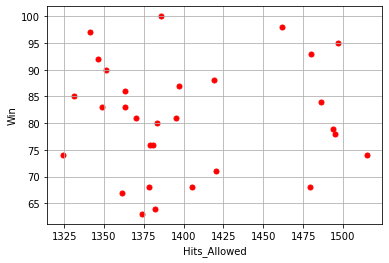

In [20]:
df.plot.scatter(x='Hits_Allowed',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
1. There seems no, relation between Wins and At Bats
2. There is no observable relation between Hits_Allowed and wins, as at every plot there are wins at random 

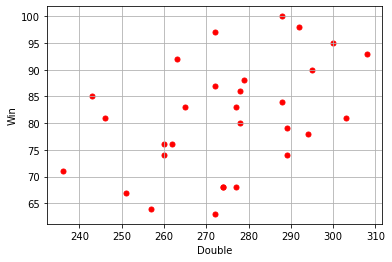

In [21]:
df.plot.scatter(x='Double',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
There seems very slight relation between, no. of doubles and Wins.

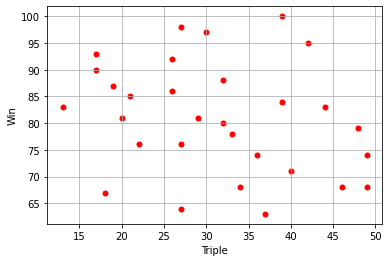

In [22]:
df.plot.scatter(x='Triple',y='Win', c = 'red', s = 25)
plt.grid()

### Observation - 
- Compared to Doubles, there are very few teams taking triple. Value count is low.
- There seems no relation between Triple and Wins

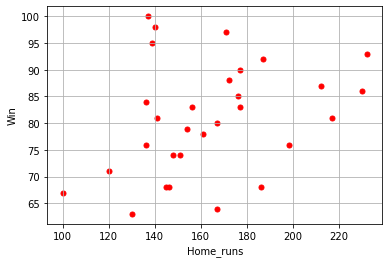

In [23]:
df.plot.scatter(x='Home_runs',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
- From above scatter plot, it is clear that for higher Home_Runs, we have high number of wins.
- For winning match, Teams need to score more runs

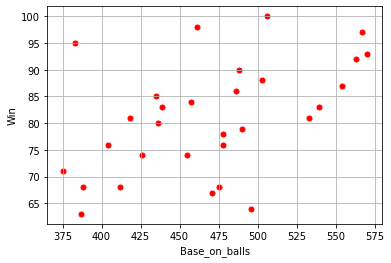

In [24]:
df.plot.scatter(x='Base_on_balls',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
- From above scatter plot, We can say that for increasing number of Base_on_Balls, we have high number of wins.
- As we have high Base_on_Balls, teams have more chance of scoring more runs
- For winning match, Teams need to have high Base_on_Balls

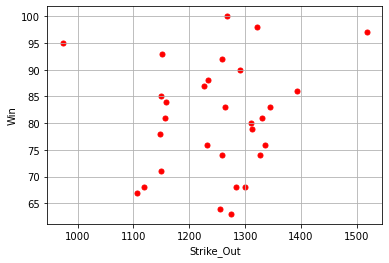

In [25]:
df.plot.scatter(x='Strike_Out',y='Win', c = 'red', s = 25)
plt.grid()

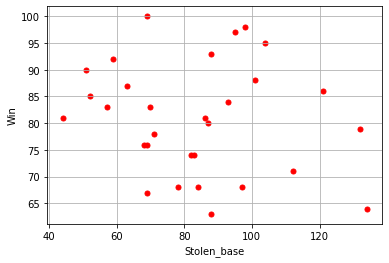

In [26]:
df.plot.scatter(x='Stolen_base',y='Win', c = 'red', s = 25)
plt.grid()

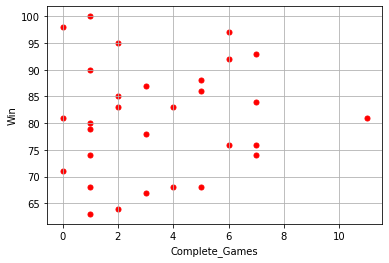

In [27]:
df.plot.scatter(x='Complete_Games',y='Win', c = 'red', s = 25)
plt.grid()

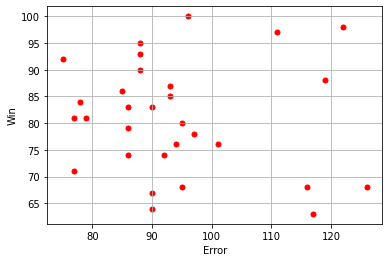

In [28]:
df.plot.scatter(x='Error',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
- There seems no relation between Strike_Out, Stolen_base, Complete_Games, Error on Wins.
- Strike out is limited in 1100 to 1400 range. Most of the wins are in this range.
- Two outliers present, below 1000 and above 1500 Strike_out.

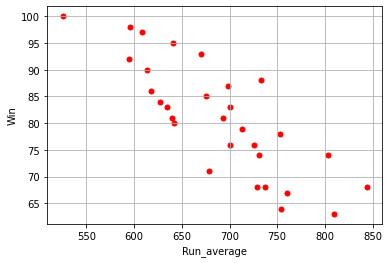

In [29]:
df.plot.scatter(x='Run_average',y='Win', c = 'red', s = 25)
plt.grid()

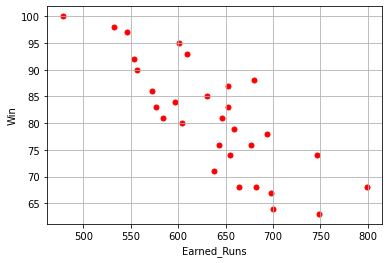

In [30]:
df.plot.scatter(x='Earned_Runs',y='Win', c = 'red', s = 25)
plt.grid()

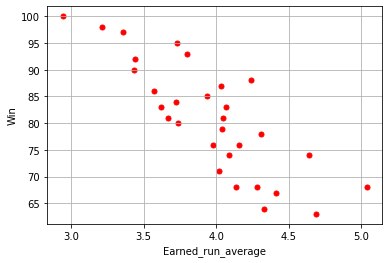

In [31]:
df.plot.scatter(x='Earned_run_average',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
- It looks quite impressive, that as Average_Runs, Earned_Run, Earned_run_average increase number of wins decreases.
- Number of Win seems to have inversly proportional to Run_average, Earned_Run, Earned_run_average

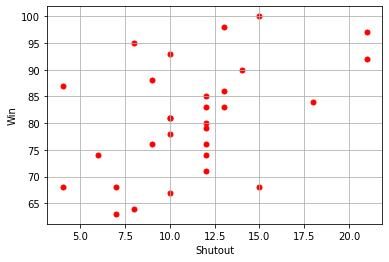

In [32]:
df.plot.scatter(x='Shutout',y='Win', c = 'red', s = 25)
plt.grid()

### Observation -
There seems very slight positive relation between Shutout and Wins.

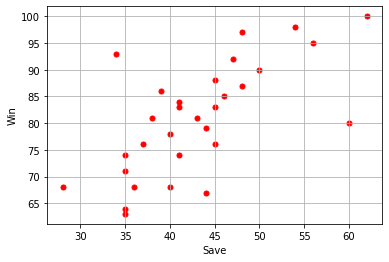

In [33]:
df.plot.scatter(x='Save',y='Win', c = 'red', s = 25)
plt.grid()

### Observation - 
There is high positive relation between saves and Wins

## 2 Residual Plots

<AxesSubplot:xlabel='Runs_Scored', ylabel='Win'>

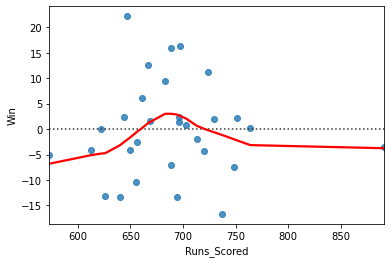

In [34]:
sns.residplot(x = df['Runs_Scored'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='At_Bat', ylabel='Win'>

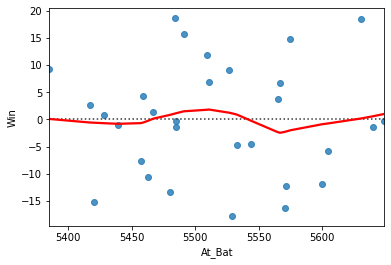

In [35]:
sns.residplot(x = df['At_Bat'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Hits_Allowed', ylabel='Win'>

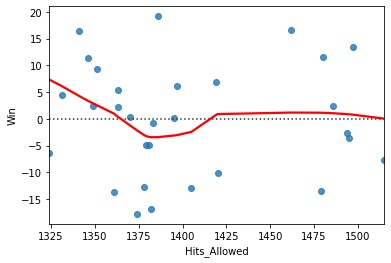

In [36]:
sns.residplot(x = df['Hits_Allowed'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Triple', ylabel='Win'>

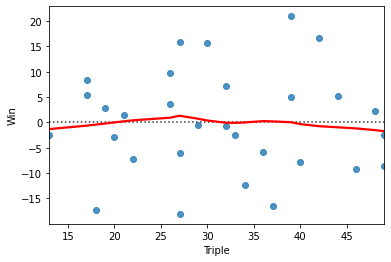

In [37]:
sns.residplot(x = df['Triple'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Base_on_balls', ylabel='Win'>

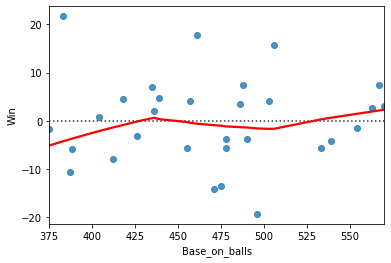

In [38]:
sns.residplot(x = df['Base_on_balls'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Double', ylabel='Win'>

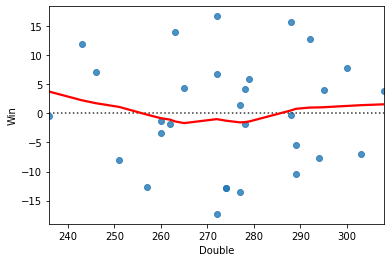

In [39]:
sns.residplot(x = df['Double'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Home_runs', ylabel='Win'>

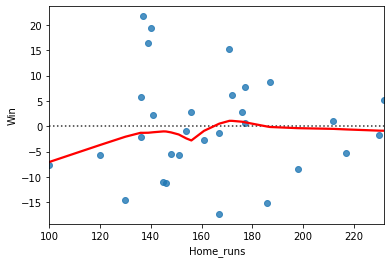

In [40]:
sns.residplot(x = df['Home_runs'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Base_on_balls', ylabel='Win'>

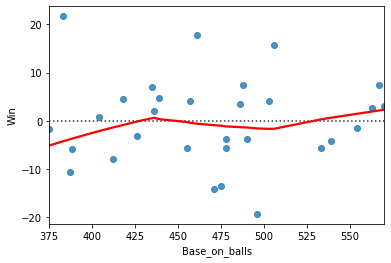

In [41]:
sns.residplot(x = df['Base_on_balls'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Strike_Out', ylabel='Win'>

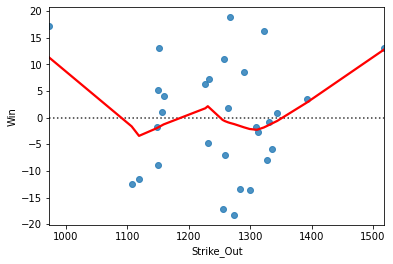

In [42]:
sns.residplot(x = df['Strike_Out'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Stolen_base', ylabel='Win'>

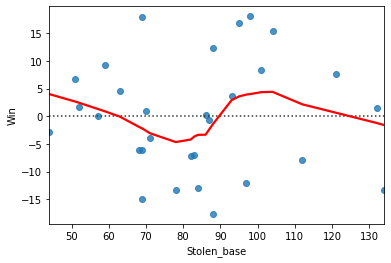

In [43]:
sns.residplot(x = df['Stolen_base'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Run_average', ylabel='Win'>

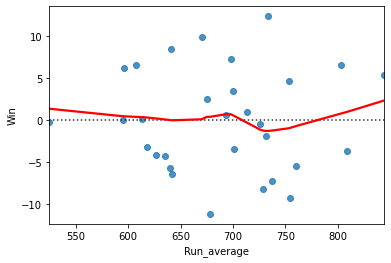

In [44]:
sns.residplot(x = df['Run_average'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Earned_Runs', ylabel='Win'>

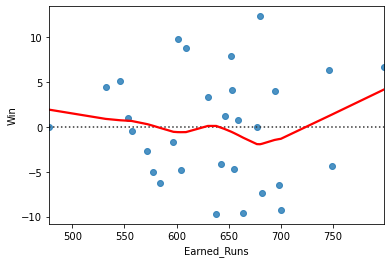

In [46]:
sns.residplot(x = df['Earned_Runs'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Earned_run_average', ylabel='Win'>

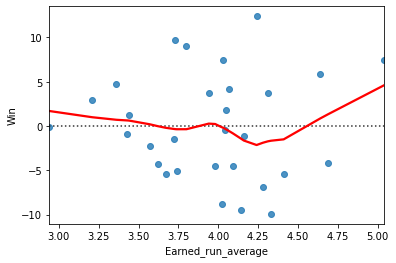

In [47]:
sns.residplot(x = df['Earned_run_average'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Complete_Games', ylabel='Win'>

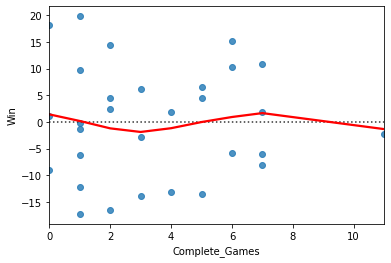

In [48]:
sns.residplot(x = df['Complete_Games'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Shutout', ylabel='Win'>

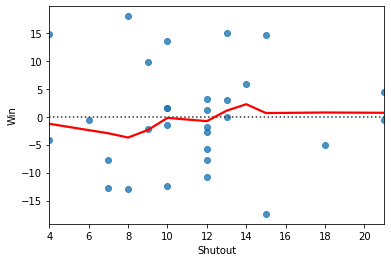

In [49]:
sns.residplot(x = df['Shutout'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Save', ylabel='Win'>

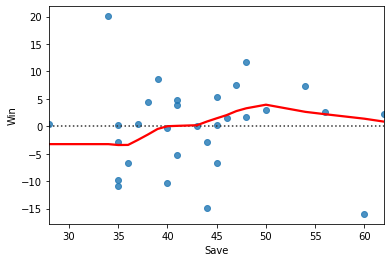

In [50]:
sns.residplot(x = df['Save'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='Error', ylabel='Win'>

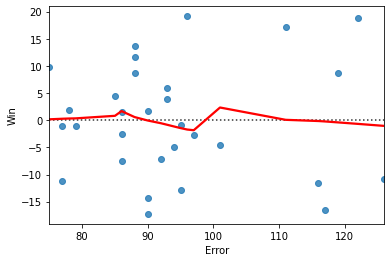

In [51]:
sns.residplot(x = df['Error'], y = df["Win"], lowess = True, line_kws=dict(color="r"))

## 3 Correlation Plot

<AxesSubplot:>

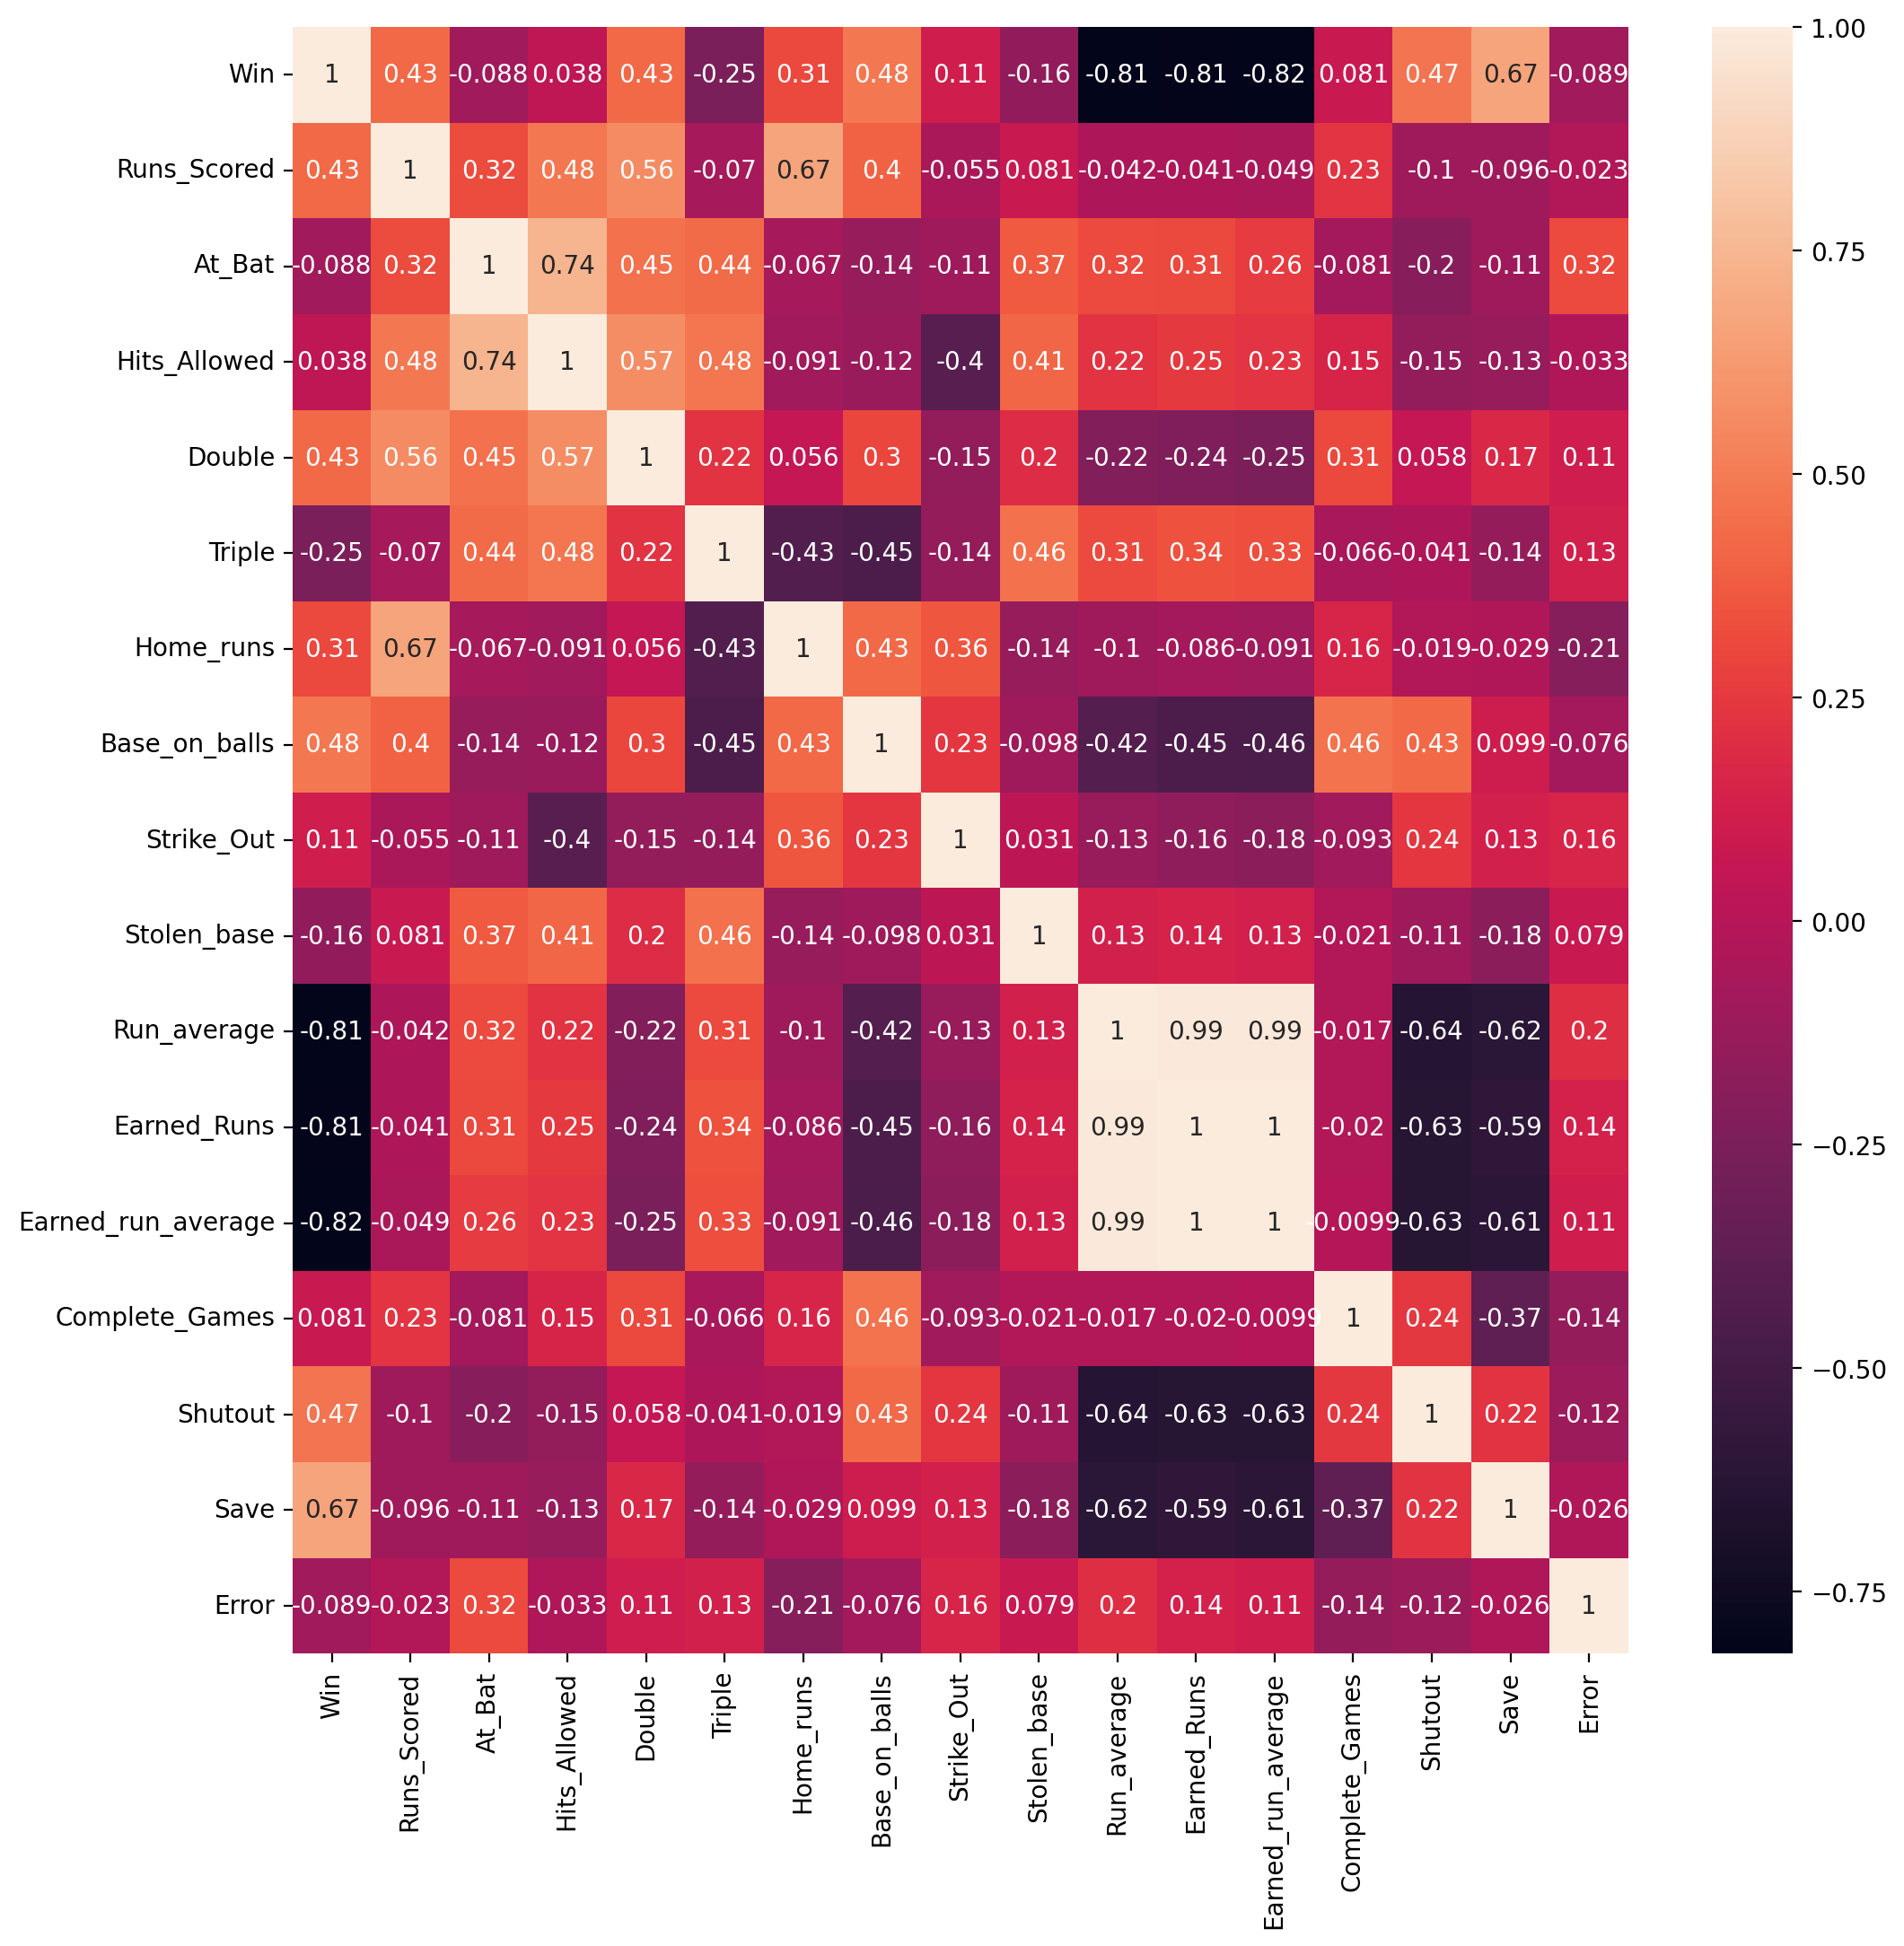

In [52]:
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(df.corr(), annot=True)

## 4 Checking Skewness of data

In [53]:
df.skew().sort_values()

Double               -0.230650
Strike_Out           -0.156065
Run_average           0.045734
Win                   0.047089
Earned_run_average    0.053331
Earned_Runs           0.058710
Triple                0.129502
Base_on_balls         0.158498
At_Bat                0.183437
Stolen_base           0.479893
Home_runs             0.516441
Shutout               0.565790
Save                  0.657524
Hits_Allowed          0.670254
Complete_Games        0.736845
Error                 0.890132
Runs_Scored           1.200786
dtype: float64

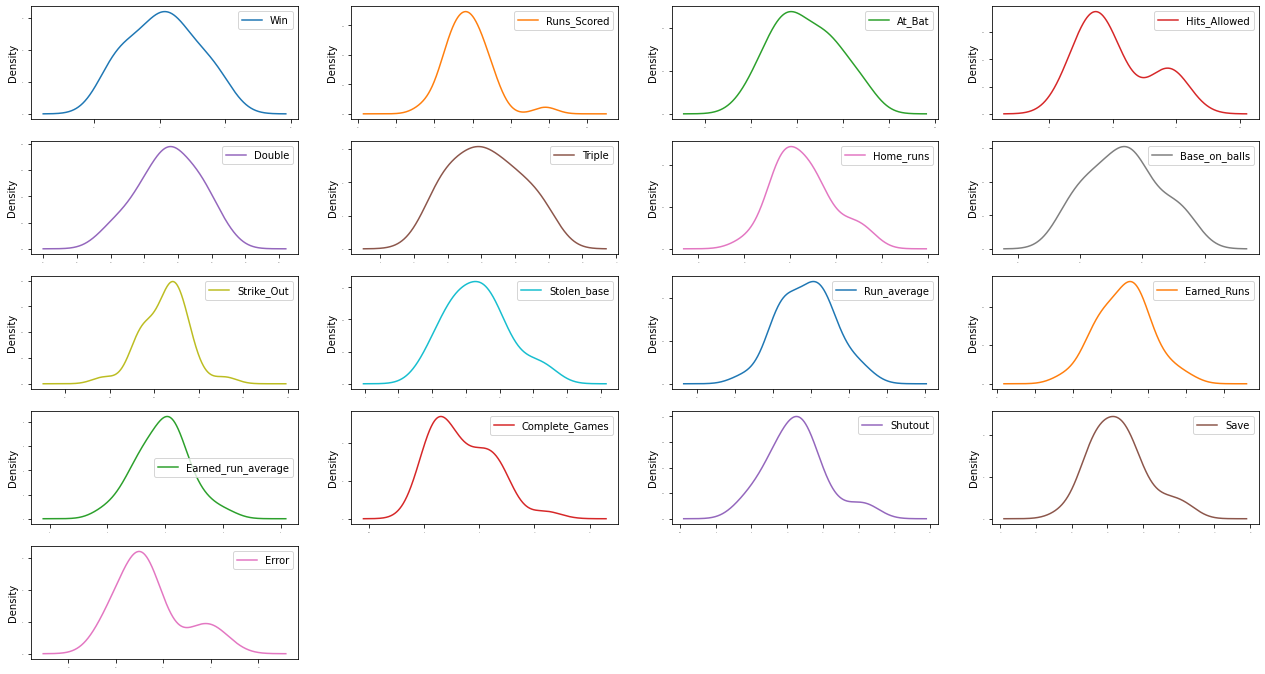

In [54]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

### Observations - 
1. From above plots and results, it is clear that, slight skewness present in below feature with given skewness.
    - Stolen_base          = 0.479893
    - Home_runs            = 0.516441
    - Shutout              = 0.565790
    - Save                 = 0.657524
    - Hits_Allowed         = 0.670254
    - Complete_Games       = 0.736845
    - Error                = 0.890132
    - Runs_Scored          = 1.200786

2. Skewness can be handled by removing outliers and taking log transform.
3. First we will check for outliers then for log distribution.

## 5 Checking Data Distribution, Skewness and Outliers

### 5.1 Data Distribution

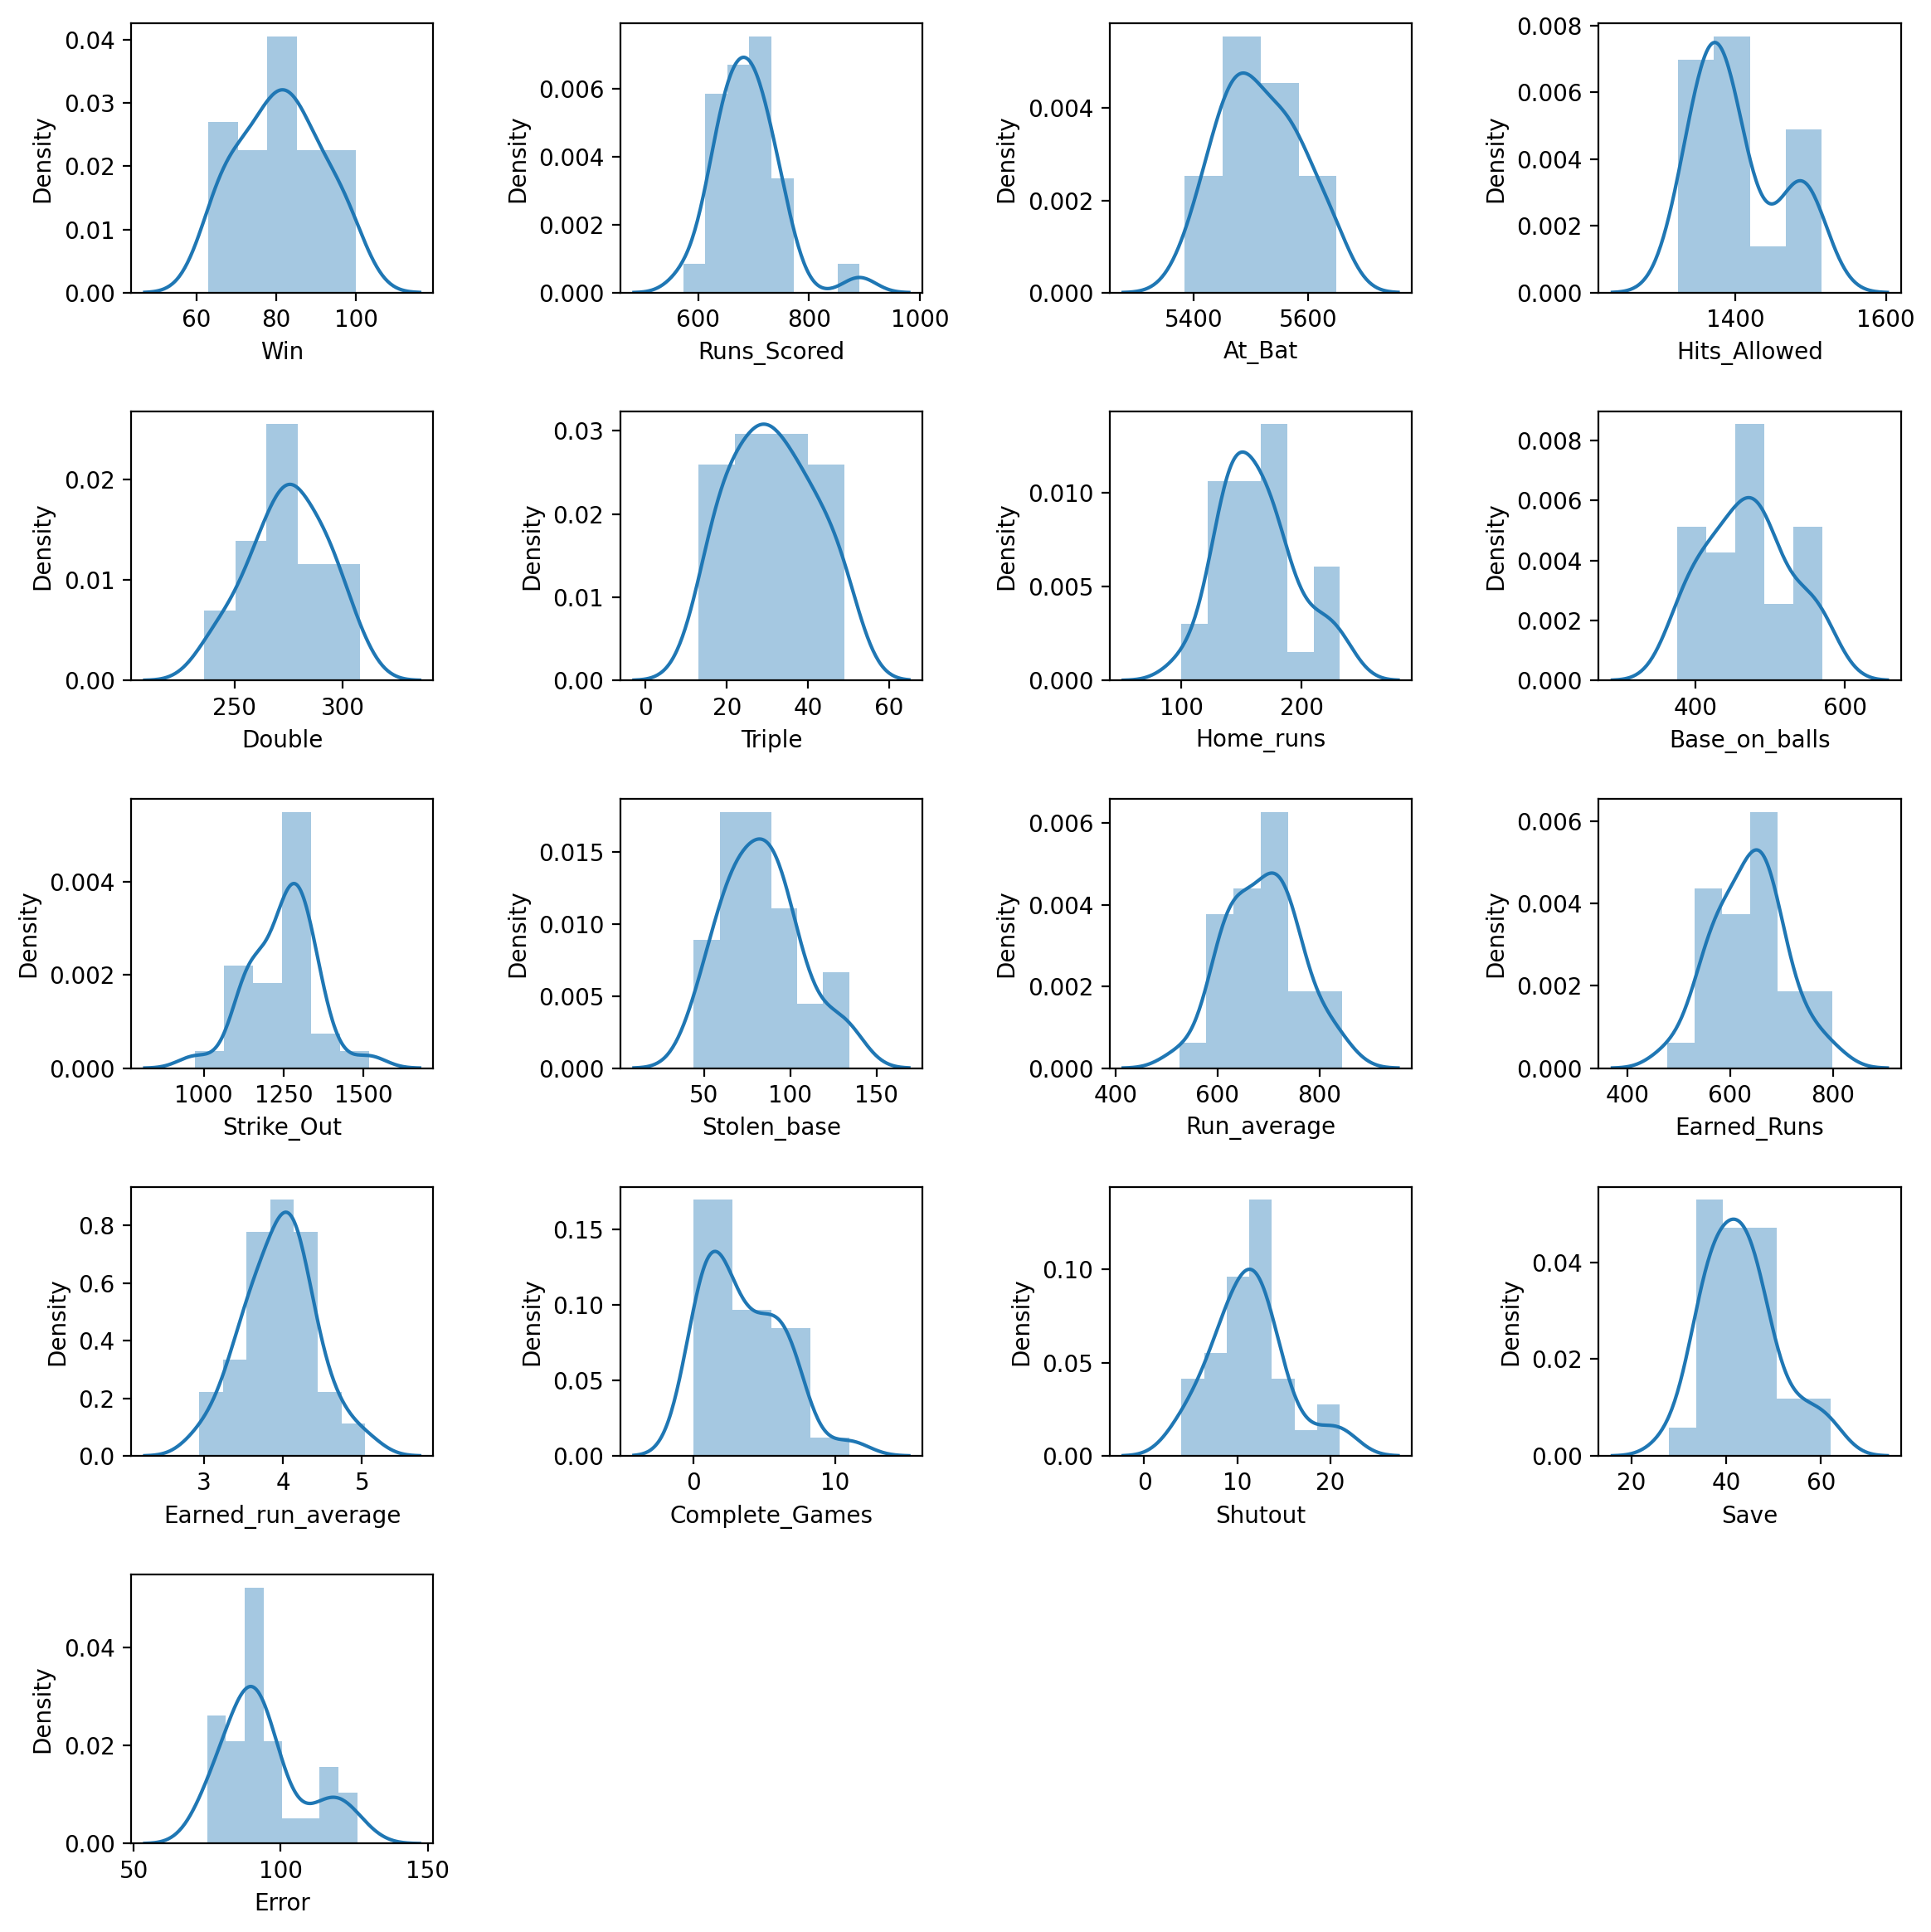

In [55]:
plt.figure(figsize=(12,12),dpi=200)
for i in enumerate(df[df.columns]):
    plt.subplot(5,4,i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout(pad=2.0)

### 5.2 Checking Outliers

Win                      AxesSubplot(0.125,0.749828;0.168478x0.130172)
Runs_Scored           AxesSubplot(0.327174,0.749828;0.168478x0.130172)
At_Bat                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Hits_Allowed          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Double                   AxesSubplot(0.125,0.593621;0.168478x0.130172)
Triple                AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Home_runs             AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Base_on_balls         AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Strike_Out               AxesSubplot(0.125,0.437414;0.168478x0.130172)
Stolen_base           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Run_average           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Earned_Runs           AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Earned_run_average       AxesSubplot(0.125,0.281207;0.168478x0.130172)
Complete_Games        AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Shutou

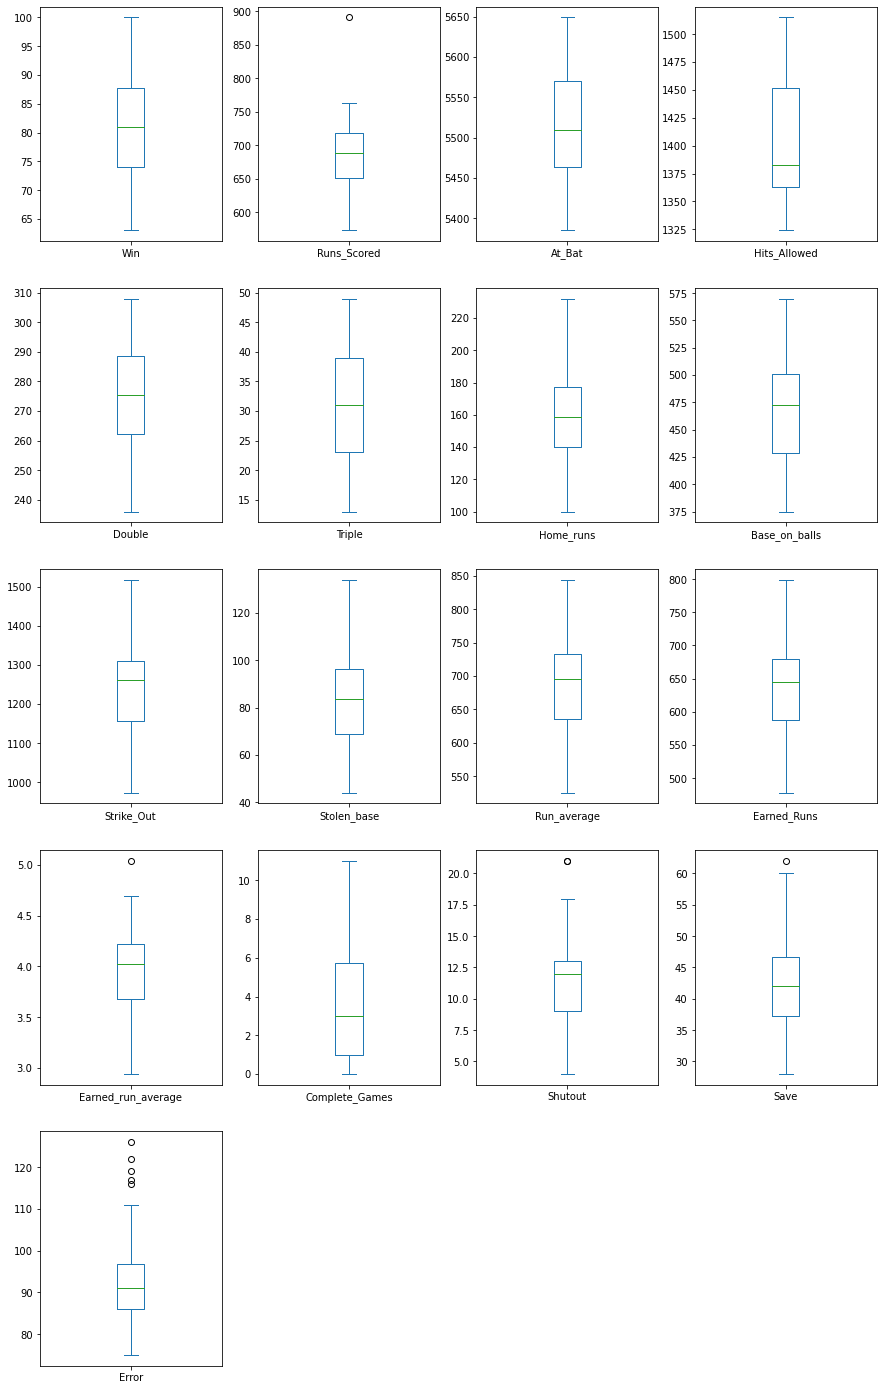

In [56]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,25))

In [57]:
outlier_features = ['Runs_Scored', 'Shutout', 'Save', 'Error']

In [58]:
for feature in outlier_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

Win                      AxesSubplot(0.125,0.749828;0.168478x0.130172)
Runs_Scored           AxesSubplot(0.327174,0.749828;0.168478x0.130172)
At_Bat                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Hits_Allowed          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Double                   AxesSubplot(0.125,0.593621;0.168478x0.130172)
Triple                AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Home_runs             AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Base_on_balls         AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Strike_Out               AxesSubplot(0.125,0.437414;0.168478x0.130172)
Stolen_base           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Run_average           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Earned_Runs           AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Earned_run_average       AxesSubplot(0.125,0.281207;0.168478x0.130172)
Complete_Games        AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Shutou

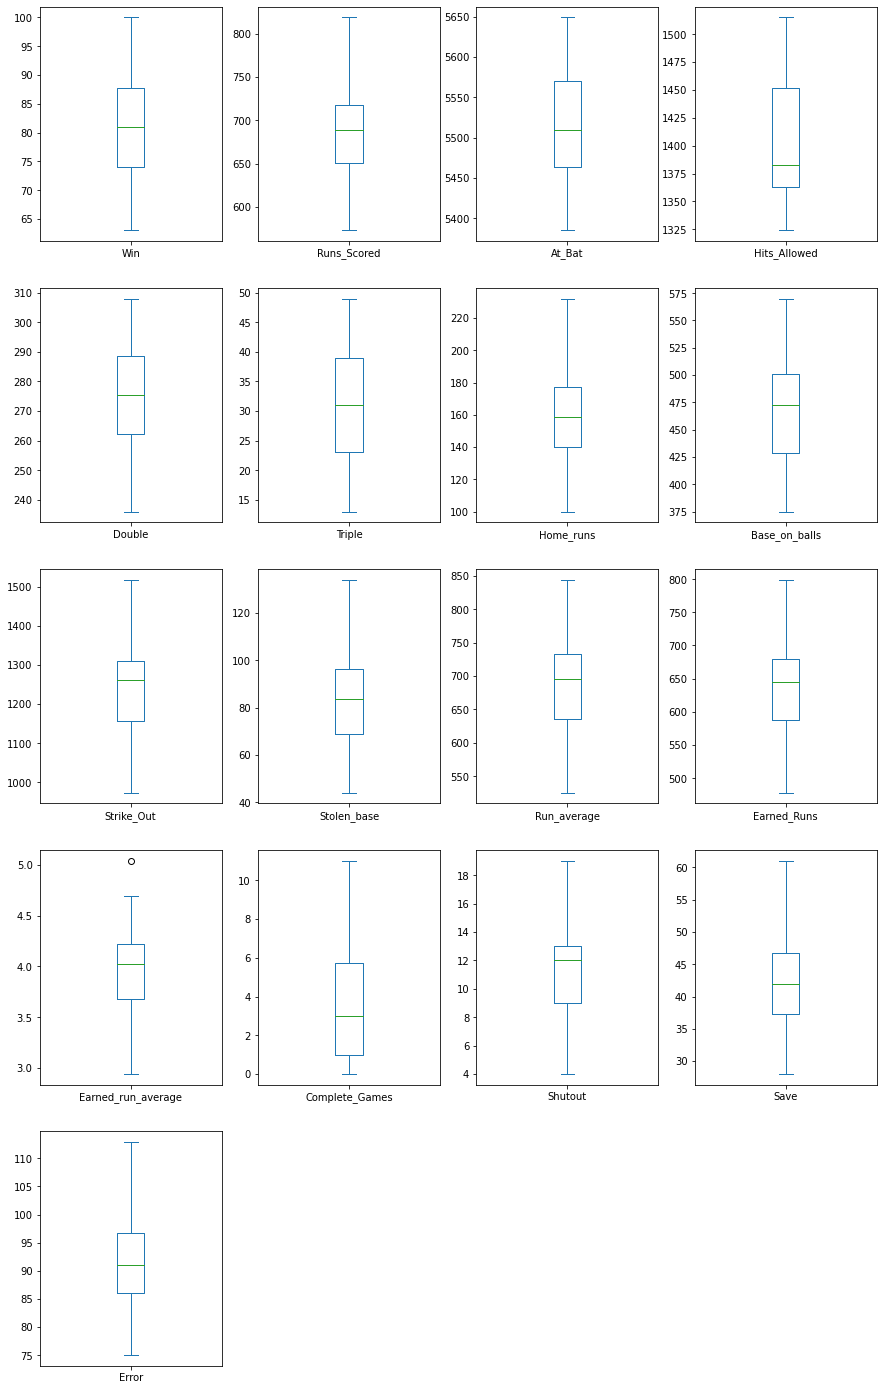

In [59]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,25))

### Observation - 
- Now, there are no outliers present in data set
- Data is ready for scaling and modelling

<AxesSubplot:>

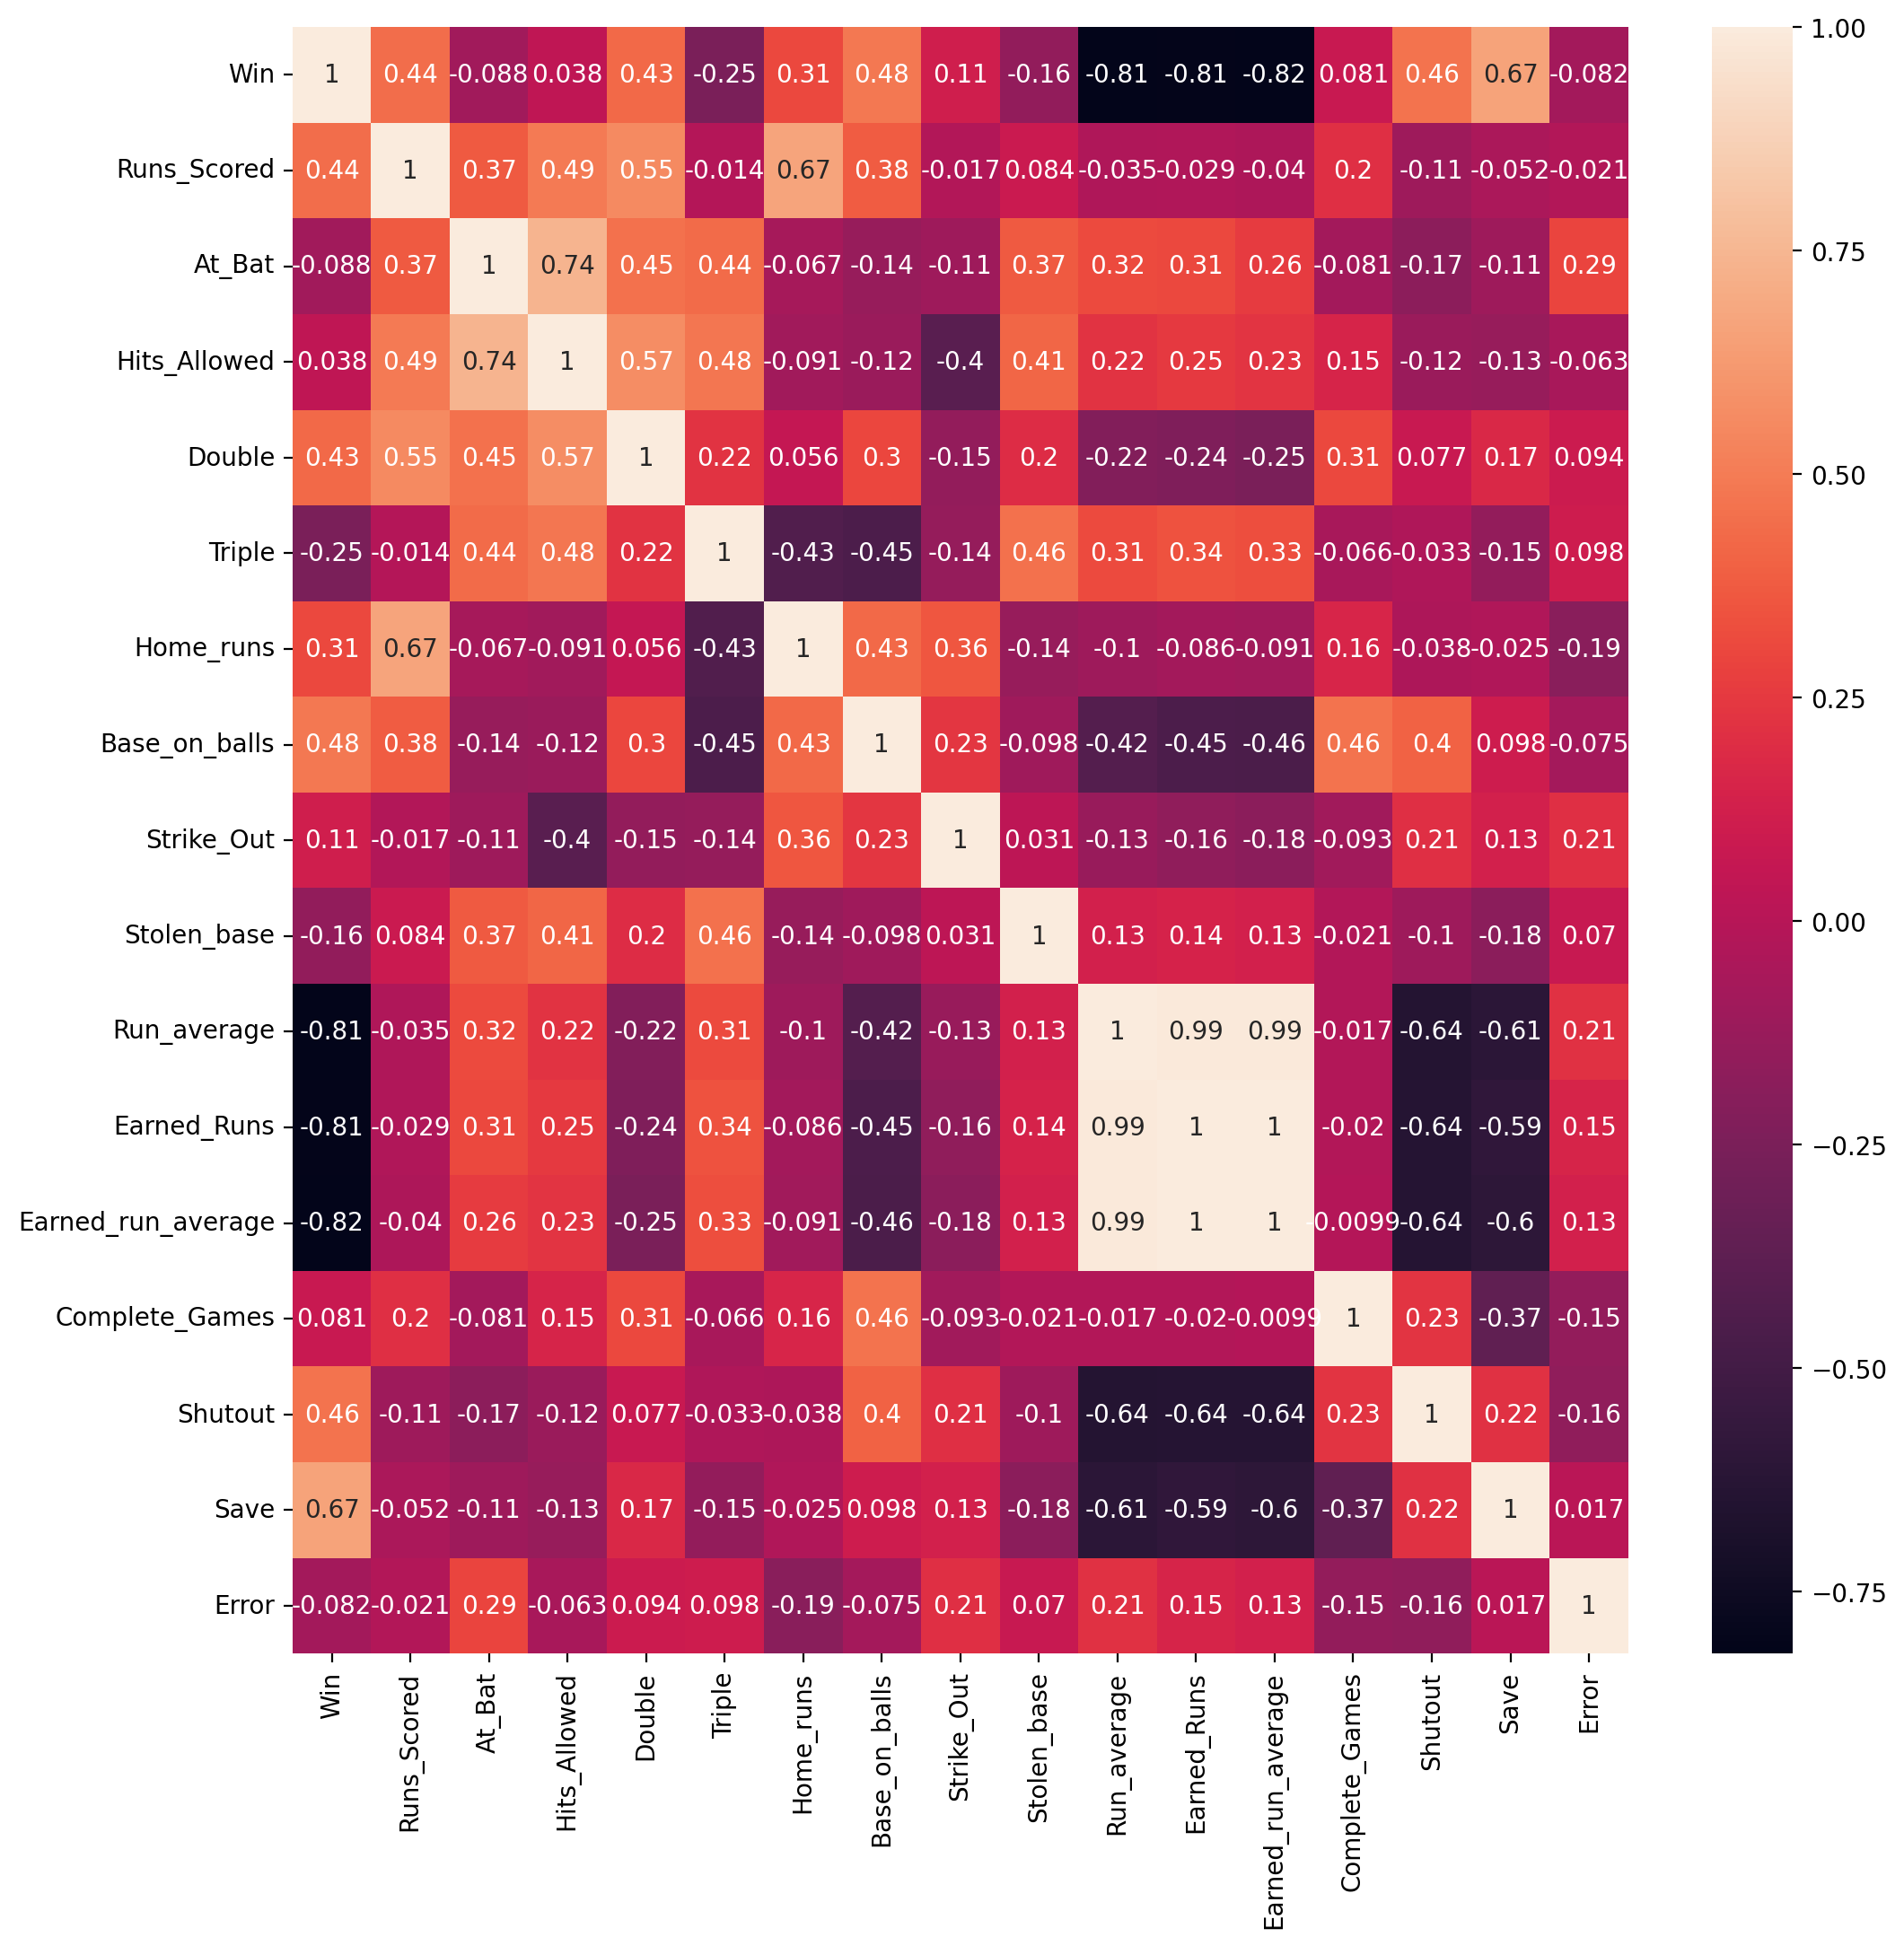

In [60]:
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

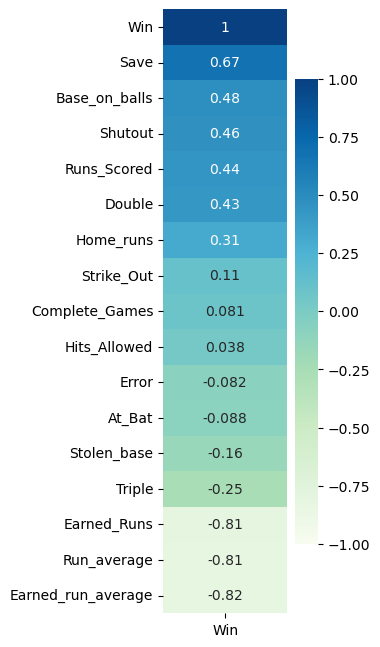

In [61]:
plt.figure(figsize=(2,8), dpi=100)
sns.heatmap(df.corr()[['Win']].sort_values(by='Win',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

### Observation - 
- There are many features which are directly proportion or have highly correlated.
- To avoid multicollinearity, we need to drop duplicate columns

# ------------------------------ Feature Engineering ----------------------------------------

### Seperating Dependent/target feature from Independent Features

In [62]:
y = df['Win']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Win, dtype: int64

In [63]:
x = df.drop('Win', axis=1)
x

,Runs_Scored,At_Bat,Hits_Allowed,Double,Triple,Home_runs,Base_on_balls,Strike_Out,Stolen_base,Run_average,Earned_Runs,Earned_run_average,Complete_Games,Shutout,Save,Error
0,724.00,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8.0,56.0,88.000
1,696.00,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12.0,45.0,86.000
2,669.00,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10.0,38.0,79.000
3,622.00,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9.0,37.0,101.000
4,689.00,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12.0,35.0,86.000
5,818.75,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10.0,34.0,88.000
6,764.00,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4.0,48.0,93.000
7,713.00,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10.0,43.0,77.000
8,644.00,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12.0,60.0,95.000
9,748.00,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10.0,40.0,97.000


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [66]:
calc_vif(x)

,variables,VIF FACTOR
0,Runs_Scored,1695.549503
1,At_Bat,3894.579012
2,Hits_Allowed,4085.148418
3,Double,850.489981
4,Triple,34.961930
5,Home_runs,238.089843
6,Base_on_balls,262.713033
7,Strike_Out,374.772190
8,Stolen_base,29.788775
9,Run_average,16601.476756


### Observation - 
It is observed that, Earned_Runs is having high VIF Factor = 45439.966779
So dropping this column.

In [67]:
x.drop('Earned_Runs', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Runs_Scored,1591.377521
1,At_Bat,3670.136957
2,Hits_Allowed,3743.433127
3,Double,829.101603
4,Triple,32.839749
5,Home_runs,190.010881
6,Base_on_balls,259.565873
7,Strike_Out,350.436489
8,Stolen_base,28.317772
9,Run_average,8476.924251


### Observation -
It is observed that, Run_average is having high VIF Factor = 8476.924251 So dropping this column.

In [68]:
x.drop('Run_average', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Runs_Scored,1554.698915
1,At_Bat,3668.597827
2,Hits_Allowed,3713.868294
3,Double,787.486708
4,Triple,32.836650
5,Home_runs,188.187400
6,Base_on_balls,227.287292
7,Strike_Out,321.583751
8,Stolen_base,27.407498
9,Earned_run_average,387.778070


### Observation -
It is observed that, Hits_Allowed is having high VIF Factor = 3713.868294 So dropping this column.

In [69]:
x.drop('Hits_Allowed', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Runs_Scored,1076.412777
1,At_Bat,2012.147866
2,Double,755.285294
3,Triple,32.269493
4,Home_runs,159.209000
5,Base_on_balls,202.821322
6,Strike_Out,306.461613
7,Stolen_base,22.481884
8,Earned_run_average,351.320442
9,Complete_Games,5.739742


### Observation -
It is observed that, At_Bat is having high VIF Factor = 2012.147866 So dropping this column.

In [70]:
x.drop('At_Bat', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Runs_Scored,952.151608
1,Double,631.869490
2,Triple,28.152572
3,Home_runs,146.266980
4,Base_on_balls,202.773760
5,Strike_Out,264.309272
6,Stolen_base,21.519454
7,Earned_run_average,119.809667
8,Complete_Games,5.599682
9,Shutout,20.285964


### Observation -
It is observed that, Runs_Scored is having high VIF Factor = 952.151608 So dropping this column.

In [71]:
x.drop('Runs_Scored', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Double,327.474840
1,Triple,25.622098
2,Home_runs,53.077103
3,Base_on_balls,185.383545
4,Strike_Out,225.312622
5,Stolen_base,21.519404
6,Earned_run_average,109.829294
7,Complete_Games,5.158000
8,Shutout,20.236654
9,Save,62.661354


In [72]:
x.drop('Double', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Triple,21.838214
1,Home_runs,50.522599
2,Base_on_balls,154.017981
3,Strike_Out,219.534089
4,Stolen_base,20.861859
5,Earned_run_average,99.403398
6,Complete_Games,4.777735
7,Shutout,20.235333
8,Save,44.294936
9,Error,81.877510


In [73]:
x.drop('Strike_Out', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Triple,21.797717
1,Home_runs,40.757370
2,Base_on_balls,152.378822
3,Stolen_base,20.260804
4,Earned_run_average,85.638107
5,Complete_Games,4.616073
6,Shutout,16.832342
7,Save,42.434922
8,Error,70.129306


In [74]:
x.drop('Base_on_balls', axis=1, inplace=True)

calc_vif(x)

,variables,VIF FACTOR
0,Triple,18.727526
1,Home_runs,33.437288
2,Stolen_base,18.618379
3,Earned_run_average,79.609952
4,Complete_Games,3.474693
5,Shutout,12.982364
6,Save,35.136072
7,Error,65.153638


# -------------------------------------------Model Building--------------------------------------------

In [80]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Without Scaling

In [127]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,200):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i, shuffle=True)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        
        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
# ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
# -----------------------------------------------------------                    
            
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


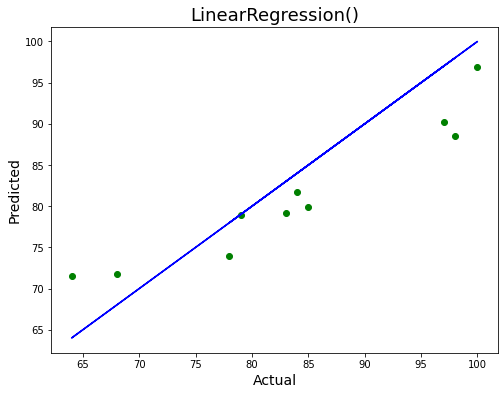

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.8697815948449655 2. Random_state 22 3. RMSE = 5.280035486628418
MAE 4.613207684548887
MSE 27.878774740055395
------------------------------------""Lasso""------------------------------------


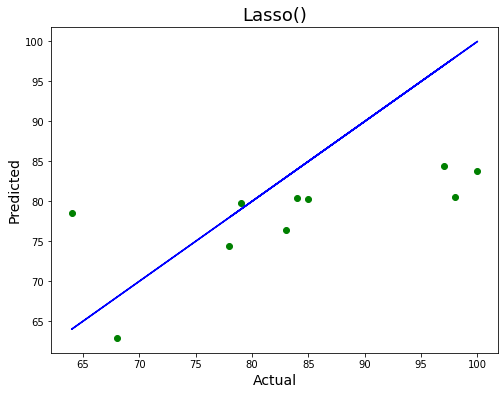

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0.8760372462470066 2. Random_state 72 3. RMSE = 10.282943816402954
MAE 8.525080154960062
MSE 105.73893353129975
------------------------------------""Ridge""------------------------------------ 


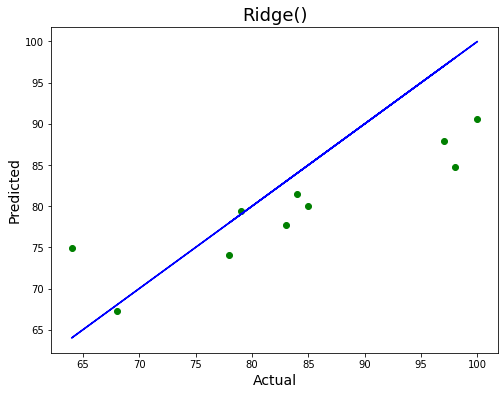

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.926630368428809 2. Random_state 157 3. RMSE = 7.376253322077015
MAE 6.065187842631286
MSE 54.409113071452204
------------------------------------""ElasticNet""------------------------------------ 


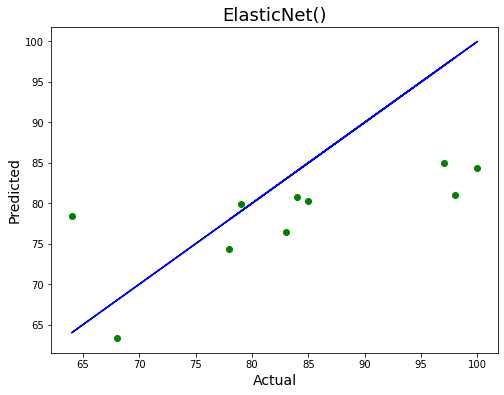

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0.8818109111540143 2. Random_state 46 3. RMSE = 9.974977669696722
MAE 8.275716409069215
MSE 99.50017951094826
------------------------------------""SVR""------------------------------------


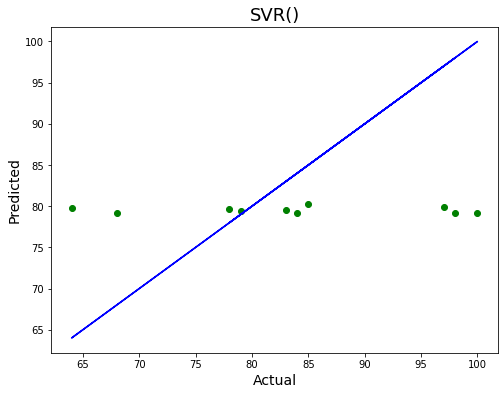

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0.062356574820700006 2. Random_state 87 3. RMSE = 12.300897370867961
MAE 9.884711079862173
MSE 151.3120761286263
------------------------------------""DecisionTreeRegressor""------------------------------------


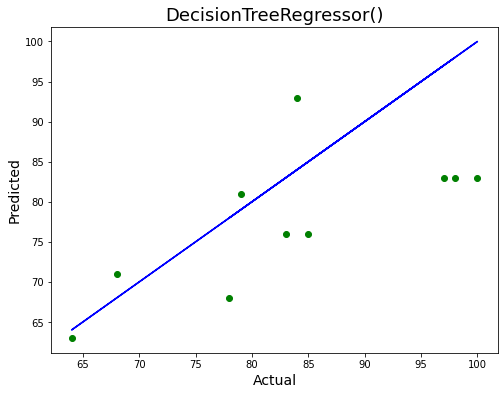

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.6883015934706569 2. Random_state 53 3. RMSE = 10.173494974687902
MAE 8.7
MSE 103.5
------------------------------------""RandomForestRegressor""------------------------------------


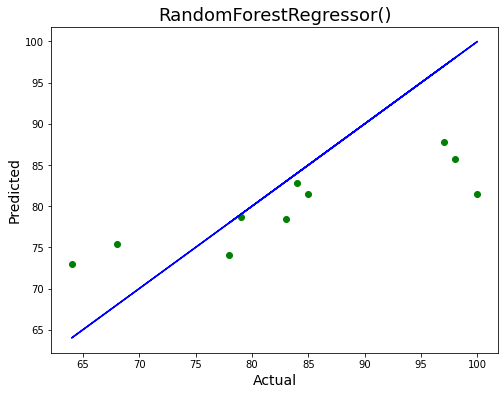

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.7960621414913955 2. Random_state 101 3. RMSE = 8.725622613888364
MAE 6.983000000000001
MSE 76.13649000000001
------------------------------------""KNeighborsRegressor""------------------------------------ 


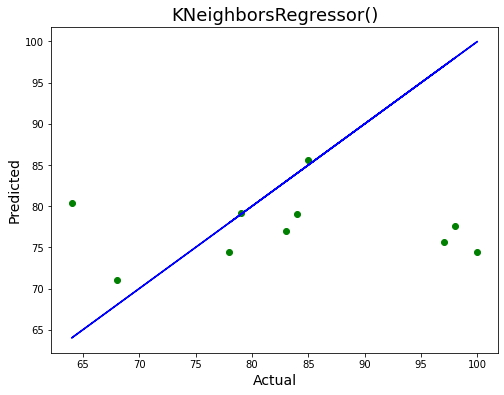

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.40607210626185963 2. Random_state 61 3. RMSE = 13.717871555019023
MAE 10.22
MSE 188.18000000000004
------------------------------------""SGDRegressor""------------------------------------


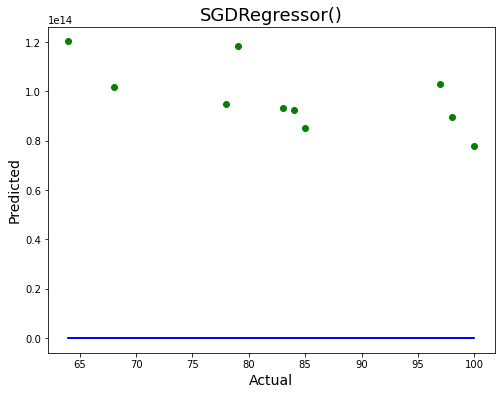

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 98483835312864.28
MAE 97640357899877.72
MSE 9.699065817931375e+27
------------------------------------""GradientBoostingRegressor""------------------------------------


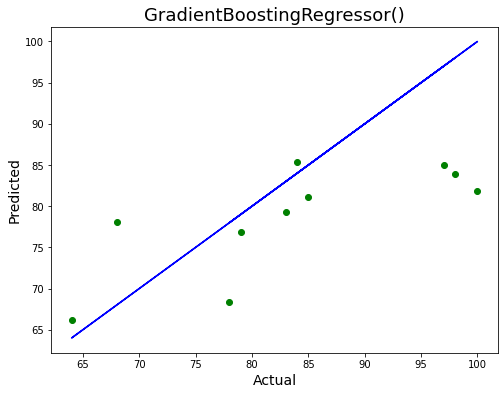

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.7345174936979725 2. Random_state 101 3. RMSE = 9.532817142725476
MAE 7.732167755250856
MSE 90.8746026766407
------------------------------------""AdaBoostRegressor""------------------------------------


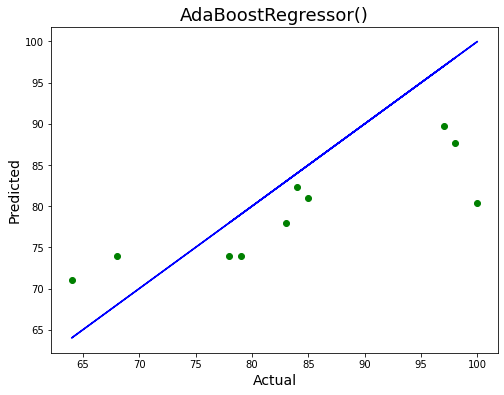

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.8175913858213777 2. Random_state 101 3. RMSE = 8.456749457258692
MAE 6.98917748917749
MSE 71.51661138284517
------------------------------------""ExtraTreesRegressor""------------------------------------


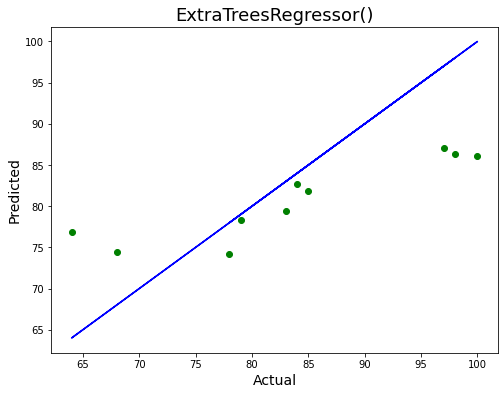

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.7493579965850883 2. Random_state 42 3. RMSE = 8.237693852043787
MAE 6.764
MSE 67.8596


In [129]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

## With Scaling

In [130]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,200):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i, shuffle=True)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


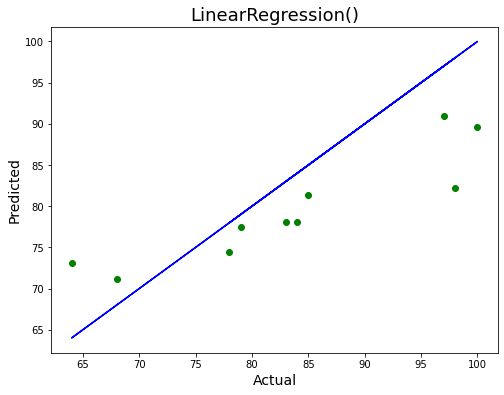

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.9189341606757002 2. Random_state 101 3. RMSE = 7.566918219349622
MAE 6.400097575100839
MSE 57.25825133832526
------------------------------------""Lasso""------------------------------------


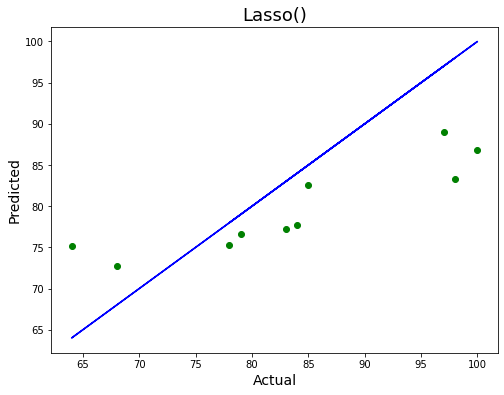

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0.9409091076933855 2. Random_state 101 3. RMSE = 8.311470895179694
MAE 7.1298022589510115
MSE 69.08054844141914
------------------------------------""Ridge""------------------------------------ 


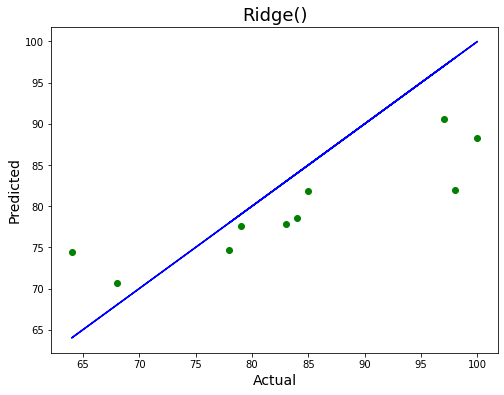

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.9409646836511487 2. Random_state 101 3. RMSE = 7.945120824823012
MAE 6.573395905670677
MSE 63.124944921036295
------------------------------------""ElasticNet""------------------------------------ 


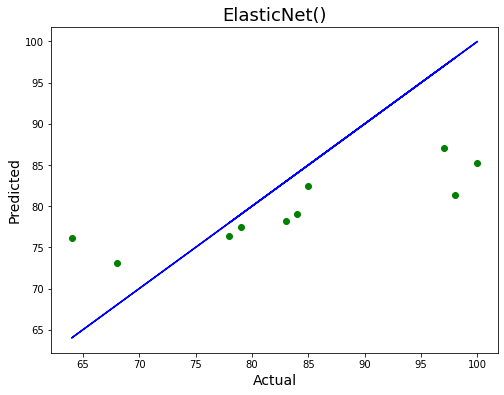

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0.8611135804353953 2. Random_state 101 3. RMSE = 9.071818290082367
MAE 7.381249322979109
MSE 82.29788708827297
------------------------------------""SVR""------------------------------------


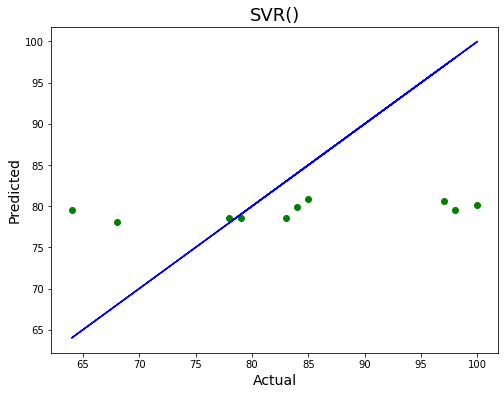

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0.18867067188802733 2. Random_state 163 3. RMSE = 11.809732104225303
MAE 9.37887110370998
MSE 139.46977237356978
------------------------------------""DecisionTreeRegressor""------------------------------------


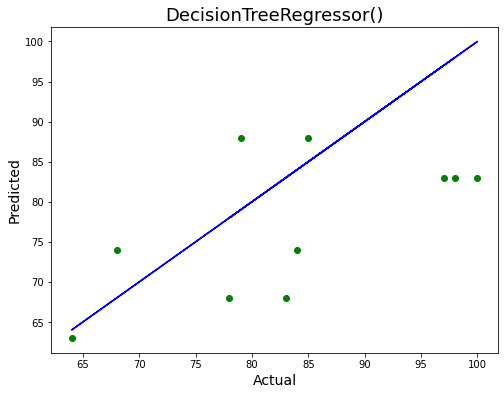

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.6853438471453484 2. Random_state 41 3. RMSE = 11.233877335986895
MAE 10.0
MSE 126.2
------------------------------------""RandomForestRegressor""------------------------------------


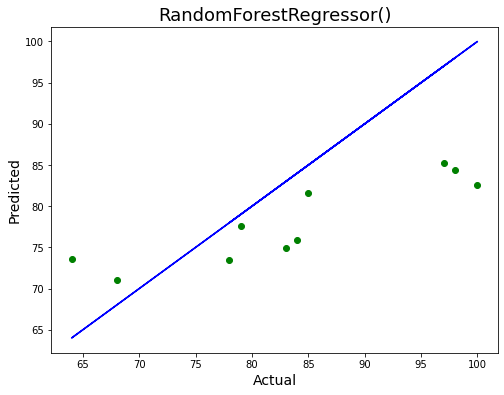

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.8439067877629064 2. Random_state 101 3. RMSE = 9.450273011929339
MAE 8.094000000000001
MSE 89.30766000000001
------------------------------------""KNeighborsRegressor""------------------------------------ 


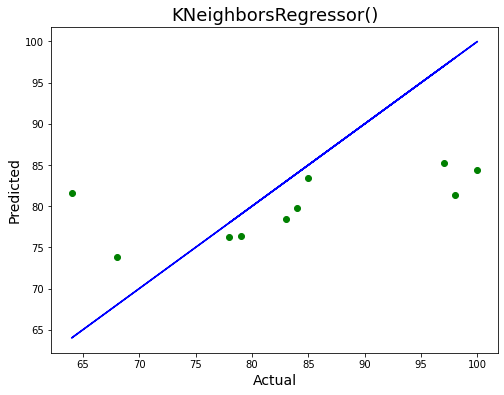

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.7416151761517615 2. Random_state 173 3. RMSE = 10.261189014924144
MAE 8.219999999999995
MSE 105.29199999999992
------------------------------------""SGDRegressor""------------------------------------


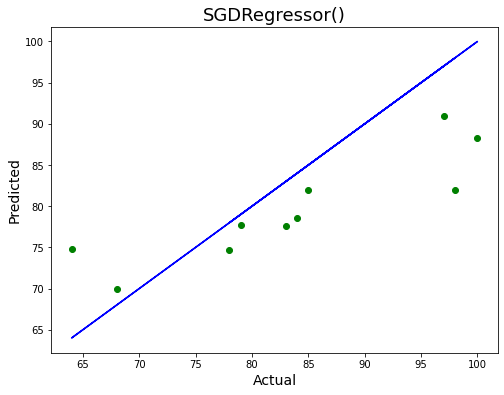

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.935932285167556 2. Random_state 101 3. RMSE = 7.960397639350732
MAE 6.510629725239913
MSE 63.367930576580704
------------------------------------""GradientBoostingRegressor""------------------------------------


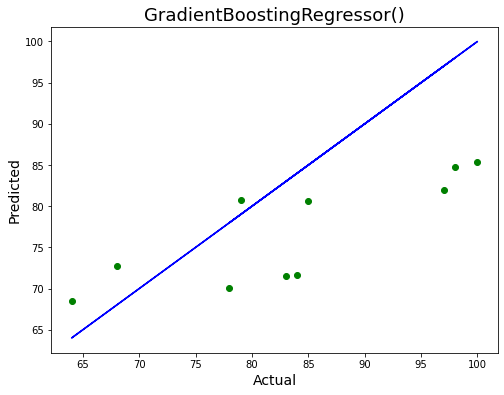

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.7430718628972093 2. Random_state 76 3. RMSE = 10.129006181056079
MAE 8.999054682722251
MSE 102.59676621587224
------------------------------------""AdaBoostRegressor""------------------------------------


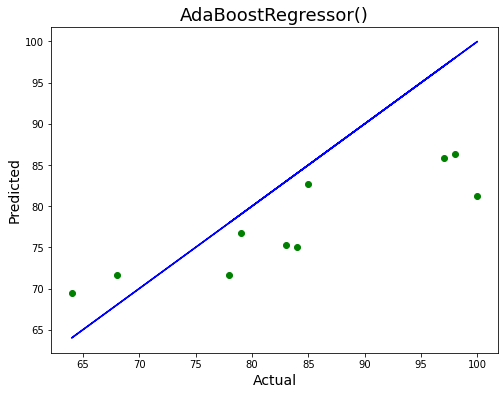

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.788063260916221 2. Random_state 101 3. RMSE = 9.203476415973586
MAE 7.827564102564104
MSE 84.70397813938202
------------------------------------""ExtraTreesRegressor""------------------------------------


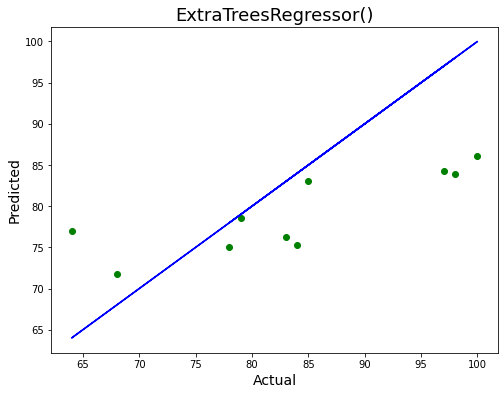

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.8514363288718929 2. Random_state 101 3. RMSE = 9.326749701798583
MAE 7.8279999999999985
MSE 86.98825999999997


In [131]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

### Observations - 
There is increase in accuracy of model, after implmenting StandardScaler. 

## Parameter Tuning For Best Model - Lasso Regression (94.12% Accuracy)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
# Added for Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [154]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 2)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.8302175681319752}
0.46612657952217484


In [155]:
# Using value of alpha as 0.00083021 to get best accuracy for Lasso Regression
lasso = Lasso(alpha = 0.83021, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

0.45146737854839314
0.5892554475877755


# Creating Model For Production¶

In [109]:
# Save File
import pickle
file = 'Base_Ball_Case_Study'
#save file
save = pickle.dump(clf,open(file,'wb'))